In [2]:
!git clone https://github.com/prasenjit52282/GridWorld.git
import os
os.chdir('GridWorld')

Cloning into 'GridWorld'...
remote: Enumerating objects: 513, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 513 (delta 68), reused 154 (delta 65), pack-reused 333 (from 1)
Receiving objects: 100% (513/513), 60.59 MiB | 14.58 MiB/s, done.
Resolving deltas: 100% (220/220), done.


/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

Value Iteration Results:
Converged in 250 iterations.
Convergence Time: 0.0836 seconds.
Optimal Policy (Pi):
 [1 2 2 2 1 2 2 2 1 2 2 0 0 0 1 2 2 2 0 1 1 1 1 0 1 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 1 3 2 3 3 3 2 3 3 3 1 1 2 0 0 1 2 3 2 2 0 3 2 2 0 3 0 1 2 2
 1 1 3 1 0 0 1 2 2 2 2 0 0 0 3 2 0 0 1 2 2 2 2 1 1 2 3 0 3 2 1 0 1 1 2 2 2
 1 1 1 1 1 0 1 0 1 2 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 2 2 2 0 0 1 2 2
 0 1 2 2 2 0 0 1 2 2 1 1 1 1 1 0 1 2 0 0 0 0 1 2 2 0 0 0 1 2 1 2 2 1 0 1 1
 1 1 1 1 0 0 0 0 0 0 0 1 2 0 0 1 2 2 2 2 2 2 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 2 2 2 2 2 2 2 2]


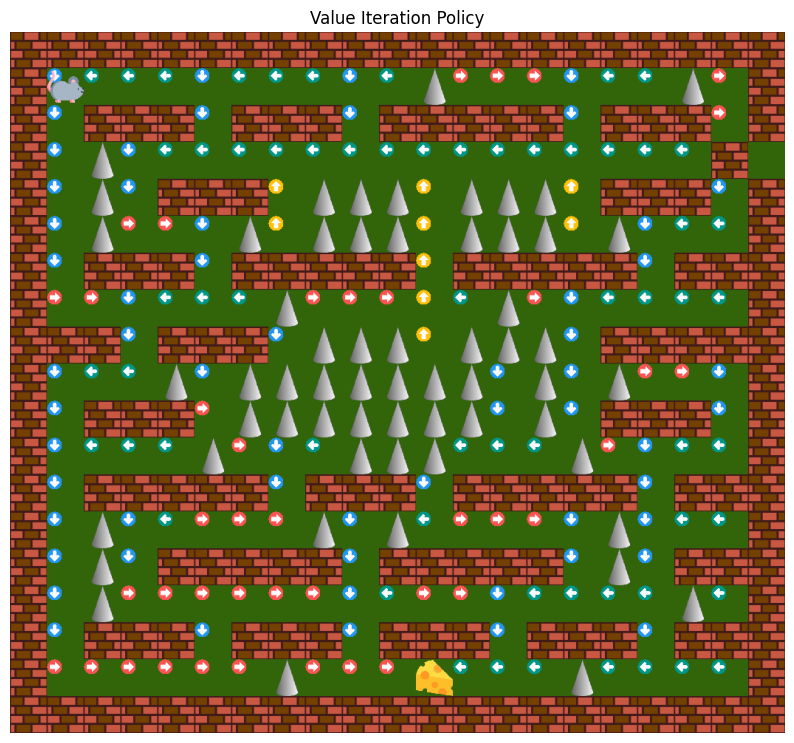

Average Reward over 100 Episodes: -125.00


In [3]:
"""
Value Iteration for GridWorld Environment

This script implements the Value Iteration algorithm to solve a GridWorld environment.
The GridWorld is a grid-based environment where an agent navigates to reach a goal while avoiding obstacles.
The script computes the optimal value function and policy using Value Iteration, visualizes the policy,
and evaluates its performance by calculating the average reward over multiple episodes.

Usage:
1. Define the GridWorld layout using a string representation of the grid.
2. Initialize the environment using the `GridWorld` class.
3. Run the Value Iteration algorithm to compute the optimal value function and policy.
4. Visualize the optimal policy on the grid.
5. Evaluate the policy by calculating the average reward over 100 episodes.

Key Features:
    - Value Iteration: Solves for the optimal value function and policy.
    - Policy Visualization: Displays the optimal policy on the GridWorld.
    - Policy Evaluation: Computes the average reward over multiple episodes.

Dependencies:
    - numpy
    - matplotlib
    - gridworld (custom environment)

Install dependencies using:
    pip install numpy matplotlib

Author: Christian Ifashe
Date: 12/03/25
Version: 1.0
"""

import numpy as np
from gridworld import GridWorld
import matplotlib.pyplot as plt
import time

# Define the grid world environment
world = \
    """
    wwwwwwwwwwwwwwwwwwwww
    wa         o      o w
    w www www wwwww www w
    w o                w
    w o www ooo ooo www w
    w o   o ooo ooo o   w
    w www wwwww wwwww www
    w      o     o      w
    www www ooo ooo wwwww
    w   o ooooooo o o   w
    w www ooooooo o www w
    w    o   ooo   o    w
    w wwwww www wwwww www
    w o     o o     o   w
    w o wwwww wwwww o www
    w o               o w
    w www www www www www
    w      o   g   o    w
    wwwwwwwwwwwwwwwwwwwww
    """

# Initialize the environment
env = GridWorld(world, slip=0)  # No stochasticity (slip=0)

# Value Iteration
def value_iteration(env, gamma=0.9, eps=1e-7):
    start_time = time.time()

    V = np.zeros((env.state_count, 1))  # Initialize value function
    V_prev = np.random.random((env.state_count, 1))  # Initialize previous value function
    iterations = 0  # Track the number of iterations

    while np.abs(V - V_prev).sum() > eps:
        Q_sa = env.R_sa + gamma * np.squeeze(np.matmul(env.P_sas, V), axis=2)
        V_prev = V.copy()
        V = np.max(Q_sa, axis=1, keepdims=True)
        iterations += 1

    # Derive the optimal policy
    pi = np.argmax(Q_sa, axis=1)

    end_time = time.time()
    convergence_time = end_time - start_time

    return V, pi, iterations, convergence_time

# Run Value Iteration
V, pi, iterations, convergence_time = value_iteration(env, gamma=0.9)

# Print results
print("Value Iteration Results:")
print(f"Converged in {iterations} iterations.")
print(f"Convergence Time: {convergence_time:.4f} seconds.")
print("Optimal Policy (Pi):\n", pi)

# Visualize the policy
screenshot = env.getScreenshot(pi)
plt.figure(figsize=(10, 10))
plt.imshow(screenshot)
plt.axis('off')
plt.title("Value Iteration Policy")
plt.show()

# Evaluate the policy
def evaluate_policy(env, pi, num_episodes=100):
    total_rewards = 0
    for _ in range(num_episodes):
        state = env.reset()
        done = False
        episode_reward = 0

        while not done:
            action = pi[state]
            state, reward, done, _ = env.step(action)
            episode_reward += reward

        total_rewards += episode_reward

    average_reward = total_rewards / num_episodes
    return average_reward

average_reward = evaluate_policy(env, pi)
print(f"Average Reward over 100 Episodes: {average_reward:.2f}")

Q-learning Results:
Convergence Time: 22.1670 seconds.
Optimal Policy (Pi):
 [1 2 2 2 0 0 0 0 1 2 0 3 1 2 3 2 1 0 0 1 1 1 2 0 1 0 0 3 0 0 0 0 0 0 0 0 0
 0 0 1 0 3 1 0 1 2 0 0 0 3 0 0 0 1 0 1 0 3 3 1 0 1 0 0 0 3 0 0 0 1 0 0 0 0
 1 1 1 0 0 0 1 2 2 2 0 0 3 3 2 2 0 0 0 0 0 0 0 1 0 0 0 0 3 0 0 0 0 1 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 0 3 2 1 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 3 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 1 2 2 2 3 0 3 1 2 0 0 1 3 1 1 2 0 0 0 0 3 2 0 0 0 0
 0 2 0 1 0 0 1 3 3]


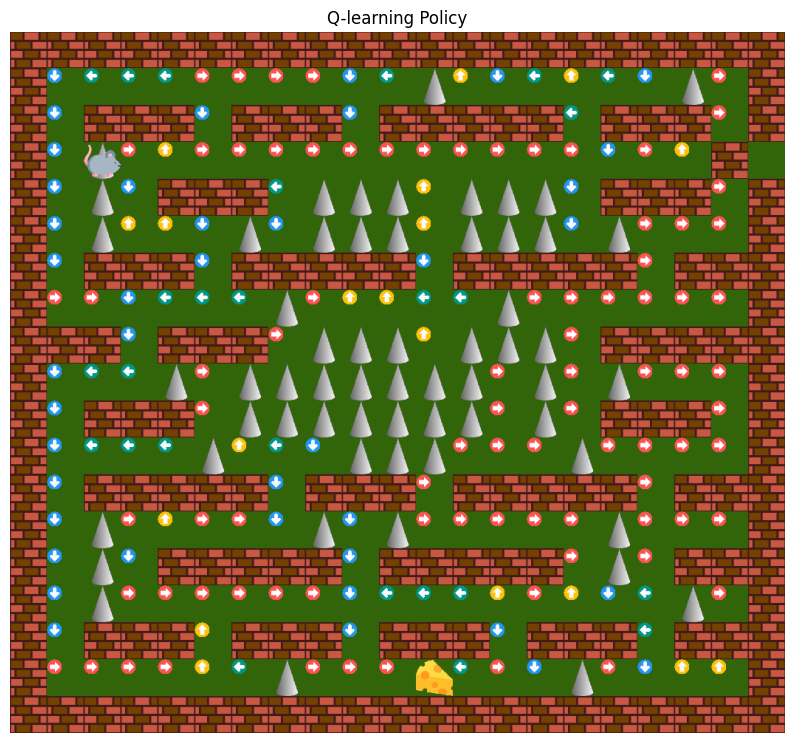

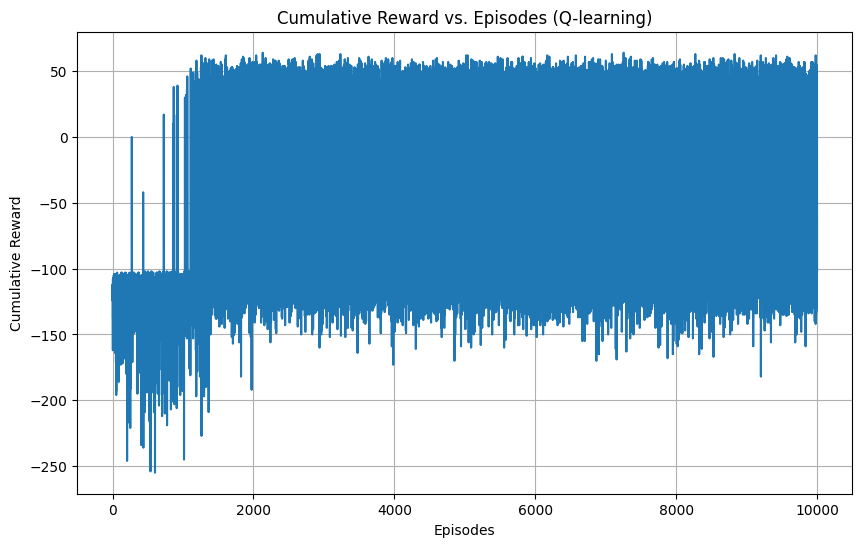

Average Reward over 100 Episodes: 67.00


In [4]:
"""
Q-learning for GridWorld Environment

This script implements the Q-learning algorithm to solve a GridWorld environment.
The GridWorld is a grid-based environment where an agent navigates to reach a goal while avoiding obstacles.
The script uses Q-learning to learn the optimal policy, visualizes the learned policy, and evaluates its
performance by calculating the average reward over multiple episodes. It also tracks cumulative rewards
over training episodes to monitor learning progress.

Usage:
1. Define the GridWorld layout using a string representation of the grid.
2. Initialize the environment using the `GridWorld` class.
3. Run the Q-learning algorithm to learn the optimal Q-table and policy.
4. Visualize the learned policy on the grid.
5. Plot cumulative rewards over training episodes.
6. Evaluate the policy by calculating the average reward over 100 episodes.

Key Features:
    - Q-learning: Learns the optimal policy using an epsilon-greedy exploration strategy.
    - Policy Visualization: Displays the learned policy on the GridWorld.
    - Cumulative Reward Plot: Tracks cumulative rewards over episodes to monitor learning progress.
    - Policy Evaluation: Computes the average reward over multiple episodes.

Dependencies:
    - numpy
    - matplotlib
    - gridworld (custom environment)

Install dependencies using:
    pip install numpy matplotlib

Author: Christian Ifashe
Date: 12/03/25
Version: 1.0
"""

import numpy as np
from gridworld import GridWorld
import random
import matplotlib.pyplot as plt
import time

# Define the grid world environment
world = \
    """
    wwwwwwwwwwwwwwwwwwwww
    wa         o      o w
    w www www wwwww www w
    w o                w
    w o www ooo ooo www w
    w o   o ooo ooo o   w
    w www wwwww wwwww www
    w      o     o      w
    www www ooo ooo wwwww
    w   o ooooooo o o   w
    w www ooooooo o www w
    w    o   ooo   o    w
    w wwwww www wwwww www
    w o     o o     o   w
    w o wwwww wwwww o www
    w o               o w
    w www www www www www
    w      o   g   o    w
    wwwwwwwwwwwwwwwwwwwww
    """

# Initialize the environment
env = GridWorld(world, slip=0)  # No stochasticity (slip=0)

# Q-learning
def q_learning(env, alpha=0.3, gamma=0.9, epsilon=0.4, episodes=10000):
    start_time = time.time()

    Q = np.zeros((env.state_count, 4))  # Initialize Q-table
    cumulative_rewards = []  # Track cumulative rewards per episode

    for episode in range(episodes):
        state = env.reset()
        done = False
        episode_reward = 0

        while not done:
            # Epsilon-greedy policy
            if random.uniform(0, 1) < epsilon:
                action = env.random_action()  # Explore
            else:
                action = np.argmax(Q[state])  # Exploit

            # Take action and observe next state and reward
            next_state, reward, done, _ = env.step(action)

            # Q-learning update
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state][best_next_action]
            td_error = td_target - Q[state][action]
            Q[state][action] += alpha * td_error

            state = next_state
            episode_reward += reward

        cumulative_rewards.append(episode_reward)

    # Derive the optimal policy
    pi = np.argmax(Q, axis=1)

    end_time = time.time()
    convergence_time = end_time - start_time

    return Q, pi, cumulative_rewards, convergence_time

# Run Q-learning
Q, pi, cumulative_rewards, convergence_time = q_learning(env, alpha=0.3, gamma=0.9, epsilon=0.4, episodes=10000)

# Print results
print("Q-learning Results:")
print(f"Convergence Time: {convergence_time:.4f} seconds.")
print("Optimal Policy (Pi):\n", pi)

# Visualize the policy
screenshot = env.getScreenshot(pi)
plt.figure(figsize=(10, 10))
plt.imshow(screenshot)
plt.axis('off')
plt.title("Q-learning Policy")
plt.show()

# Plot cumulative rewards
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards)
plt.xlabel("Episodes")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward vs. Episodes (Q-learning)")
plt.grid()
plt.show()

# Evaluate the policy
average_reward = evaluate_policy(env, pi)
print(f"Average Reward over 100 Episodes: {average_reward:.2f}")

In [ ]:
"""
Q-learning Hyperparameter Tuning for GridWorld Environment

This script performs hyperparameter tuning for the Q-learning algorithm in a GridWorld environment.
It tests different combinations of discount factor (γ) and exploration rate (ε) to evaluate their impact
on the learning process. Metrics such as convergence time, average reward, success rate, average episode
length, and Q-value variance are computed for each combination. The results are visualized to analyze
the effects of hyperparameters on the performance of Q-learning.

Usage:
1. Define the GridWorld layout using a string representation of the grid.
2. Initialize the environment using the `GridWorld` class.
3. Specify the learning rate (α), number of episodes, and ranges for γ and ε to test.
4. Run the script to train Q-learning for each combination of γ and ε.
5. View numerical metrics and visualizations of the results.

Key Features:
    - Hyperparameter Tuning: Tests different combinations of γ and ε.
    - Metrics Tracking: Tracks convergence time, average reward, success rate, average episode length,
      and Q-value variance.
    - Visualizations: Plots average episode length over episodes for different hyperparameter combinations.

Dependencies:
    - numpy
    - matplotlib
    - gridworld (custom environment)

Install dependencies using:
    pip install numpy matplotlib

Author: Christian Ifashe
Date: 12/03/25
Version: 1.0
"""

import numpy as np
from gridworld import GridWorld
import random
import matplotlib.pyplot as plt
import time

# Define the grid world environment
world = \
    """
    wwwwwwwwwwwwwwwwwwwww
    wa         o      o w
    w www www wwwww www w
    w o                w
    w o www ooo ooo www w
    w o   o ooo ooo o   w
    w www wwwww wwwww www
    w      o     o      w
    www www ooo ooo wwwww
    w   o ooooooo o o   w
    w www ooooooo o www w
    w    o   ooo   o    w
    w wwwww www wwwww www
    w o     o o     o   w
    w o wwwww wwwww o www
    w o               o w
    w www www www www www
    w      o   g   o    w
    wwwwwwwwwwwwwwwwwwwww
    """

# Initialize the environment
env = GridWorld(world, slip=0)  # No stochasticity (slip=0)

# Q-learning parameters
alpha = 0.3  # Learning rate
episodes = 10000  # Total number of episodes to train

# Parameters to test
gammas = [0.1, 0.5, 0.7, 0.9, 0.99]  # Discount factors
epsilons = [0.1, 0.3, 0.5, 0.7, 0.9]  # Exploration rates

# Store results
results = []

# Run Q-learning for each combination of gamma and epsilon
for gamma in gammas:
    for epsilon in epsilons:
        print(f"Training with γ={gamma}, ε={epsilon}...")

        # Initialize Q-table
        Q = np.zeros((env.state_count, 4))

        # Track metrics
        cumulative_rewards = []
        success_rates = []
        episode_lengths = []
        start_time = time.time()

        for episode in range(episodes):
            state = env.reset()
            done = False
            total_reward = 0
            steps = 0  # Track episode length

            while not done:
                # Epsilon-greedy policy
                if random.uniform(0, 1) < epsilon:
                    action = env.random_action()  # Explore
                else:
                    action = np.argmax(Q[state])  # Exploit

                # Take action and observe next state and reward
                next_state, reward, done, _ = env.step(action)

                # Q-learning update
                best_next_action = np.argmax(Q[next_state])
                td_target = reward + gamma * Q[next_state][best_next_action]
                td_error = td_target - Q[state][action]
                Q[state][action] += alpha * td_error

                state = next_state
                total_reward += reward
                steps += 1

            # Record metrics for this episode
            cumulative_rewards.append(total_reward)
            success_rates.append(1 if reward > 0 else 0)  # Assume positive reward for reaching the goal
            episode_lengths.append(steps)

        # Compute final metrics
        convergence_time = time.time() - start_time
        average_reward = np.mean(cumulative_rewards)
        success_rate = np.mean(success_rates)
        average_episode_length = np.mean(episode_lengths)
        final_Q_variance = np.var(Q)  # Variance of the final Q-values

        # Store results for this combination of gamma and epsilon
        results.append({
            "gamma": gamma,
            "epsilon": epsilon,
            "convergence_time": convergence_time,
            "average_reward": average_reward,
            "success_rate": success_rate,
            "average_episode_length": average_episode_length,
            "final_Q_variance": final_Q_variance,
            "policy": np.argmax(Q, axis=1)
        })

# Print numerical metrics
print("\nNumerical Metrics:")
for result in results:
    print(f"γ={result['gamma']}, ε={result['epsilon']}:")
    print(f"  Convergence Time: {result['convergence_time']:.2f} seconds")
    print(f"  Average Reward: {result['average_reward']:.2f}")
    print(f"  Success Rate: {result['success_rate'] * 100:.2f}%")
    print(f"  Average Episode Length: {result['average_episode_length']:.2f} steps")
    print(f"  Final Q-value Variance: {result['final_Q_variance']:.2f}")
    print()

# Plot average episode lengths for different gamma and epsilon values
plt.figure(figsize=(15, 10))
for result in results:
    label = f"γ={result['gamma']}, ε={result['epsilon']}"
    plt.plot(np.cumsum(result['episode_lengths']) / np.arange(1, episodes + 1), label=label)

plt.xlabel("Episodes")
plt.ylabel("Average Episode Length")
plt.title("Average Episode Length vs. Episodes for Different γ and ε")
plt.legend()
plt.grid()
plt.show()

# Plot average episode lengths for different gamma and epsilon values
plt.figure(figsize=(15, 10))
for result in results:
    label = f"γ={result['gamma']}, ε={result['epsilon']}"
    plt.plot(np.cumsum(result['episode_lengths']) / np.arange(1, episodes + 1), label=label)

plt.xlabel("Episodes")
plt.ylabel("Average Episode Length")
plt.title("Average Episode Length vs. Episodes for Different γ and ε")
plt.legend()
plt.grid()
plt.show()